In [7]:
from xlrd import open_workbook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import svm
#import xgboost
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import roc_auc_score

import collections
import os
import pandas as pd
import networkx as nx
import math
import re
from difflib import SequenceMatcher
from unidecode import unidecode 
from openpyxl import Workbook

In [5]:
!pip install unidecode

In [8]:
# edge embbeding functions
def avg_sum(v1, v2):
    return (np.array(v1)+np.array(v2))/2
def mult(v1, v2):
    return np.array(v1)*np.array(v2)
def w_l1(v1, v2):
    return np.abs(np.array(v1)-np.array(v2))
def w_l2(v1, v2):
    return (np.array(v1)-np.array(v2))**2
def nw_l1(v1, v2, graph, n1, n2, embs ):
    neig1 = [n for n in graph.neighbors(str(n1))]
    neig2 = [n for n in graph.neighbors(str(n2))]
    sum1 = np.zeros(len(v1))
    sum2 = np.zeros(len(v2))
    for n in neig1:
        sum1 += np.array(embs[int(n)])
    for n in neig2:
        sum2 += np.array(embs[int(n)])
    return np.abs((sum1+np.array(v1))/(len(neig1)+1)+(sum2+np.array(v2))/(len(neig2)+1))
def nw_l2(v1, v2, graph, n1, n2, embs ):
    neig1 = [n for n in graph.neighbors(str(n1))]
    neig2 = [n for n in graph.neighbors(str(n2))]
    sum1 = np.zeros(len(v1))
    sum2 = np.zeros(len(v2))
    for n in neig1:
        sum1 += np.array(embs[int(n)])
    for n in neig2:
        sum2 += np.array(embs[int(n)])
    return ((sum1+np.array(v1))/(len(neig1)+1)+(sum2+np.array(v2))/(len(neig2)+1))**2

In [9]:
Graph_2015 = nx.read_gml("C:\Users\DADII\Downloads\jcdl\Data\G_2015.gml")
Graph_2016= nx.read_gml("C:\Users\DADII\Downloads\jcdl\Data\G_2016.gml")
Graph_2017 = nx.read_gml("C:\Users\DADII\Downloads\jcdl\Data\G_2017.gml")

In [4]:
#nodes_2015 = []
#empty =[nodes_2015.append(n) for n in Graph_2015.nodes()]
#nodes_2016 = []
#empty =[nodes_2016.append(n) for n in Graph_2016.nodes()]
#nodes_2017 = []
#empty =[nodes_2017.append(n) for n in Graph_2017.nodes()]

In [5]:
#edges_2015 = []
#empty =[edges_2015.append(n) for n in Graph_2015.edges()]
#edges_2016 = []
#empty =[edges_2016.append(n) for n in Graph_2016.edges()]
#edges_2017 = []
#empty =[edges_2017.append(n) for n in Graph_2017.edges()]

In [10]:
f_2015 = open('C:\Users\DADII\Downloads\jcdl\Data\edgelist__2015.txt')
f_2016 = open('C:\Users\DADII\Downloads\jcdl\Data\edgelist__2016.txt')
f_2017 = open('C:\Users\DADII\Downloads\jcdl\Data\edgelist__2017.txt')


edges_2015 = []
edges_2016 = []
edges_2017 = []


for line in f_2015:
    edges_2015.append(line.split(' '))
for line in f_2016:
    edges_2016.append(line.split(' '))
for line in f_2017:
    edges_2017.append(line.split(' '))

f_2015.close()
f_2016.close()
f_2017.close()

for i in range(len(edges_2015)):
    edges_2015[i][2] = edges_2015[i][2][:-1]

for i in range(len(edges_2016)):
    edges_2016[i][2] = edges_2016[i][2][:-1]
    
for i in range(len(edges_2017)):
    edges_2017[i][2] = edges_2017[i][2][:-1]

In [36]:
edges_2016

[['251', '887', '0.1'],
 ['1807', '2774', '0.1'],
 ['973', '2456', '0.1'],
 ['700', '1072', '0.1'],
 ['391', '4236', '0.1'],
 ['2381', '3140', '0.1'],
 ['327', '3090', '0.1'],
 ['1755', '1770', '0.1'],
 ['1361', '4675', '0.1'],
 ['3025', '3405', '0.1'],
 ['3399', '3403', '0.1'],
 ['5610', '6002', '0.1'],
 ['273', '1326', '0.1'],
 ['438', '4064', '0.1'],
 ['2102', '5662', '0.1'],
 ['1168', '4991', '0.1'],
 ['1629', '4362', '0.1'],
 ['1645', '2638', '0.1'],
 ['55', '2613', '0.1'],
 ['3389', '3394', '0.1'],
 ['771', '4189', '0.1'],
 ['3356', '5133', '0.1'],
 ['705', '5821', '0.1'],
 ['818', '3285', '0.1'],
 ['1811', '1973', '0.1'],
 ['2024', '2543', '2.7'],
 ['1579', '5002', '0.1'],
 ['3833', '5316', '4'],
 ['173', '771', '0.1'],
 ['898', '4168', '0.1'],
 ['302', '601', '0.1'],
 ['2604', '6329', '1'],
 ['129', '1253', '0.1'],
 ['29', '4071', '0.1'],
 ['273', '2777', '0.1'],
 ['243', '791', '0.1'],
 ['248', '683', '0.1'],
 ['299', '601', '0.1'],
 ['1233', '5060', '0.1'],
 ['921', '1030', '

In [13]:
edges_2015_dict = {(e[0], e[1]) : e[2] for e in edges_2015}
edges_2016_dict = {(e[0], e[1]) : e[2] for e in edges_2016}
edges_2017_dict = {(e[0], e[1]) : e[2] for e in edges_2017}

In [14]:
nodes_2015 = []
for e in edges_2015:
    nodes_2015.extend(e[:2])
nodes_2015 = set(nodes_2015)

nodes_2016 = []
for e in edges_2016:
    nodes_2016.extend(e[:2])
nodes_2016 = set(nodes_2016)

nodes_2017 = []
for e in edges_2017:
    nodes_2017.extend(e[:2])
nodes_2017 = set(nodes_2017)

In [15]:
# negative sampling
k = 0
neg_sample_2016 = []
while k != len(edges_2016):
    i = np.random.choice(list(nodes_2016))
    j = np.random.choice(list(nodes_2016))
    if i!=j and (i,j) not in edges_2016_dict.keys():
        neg_sample_2016.append((i,j))
        k +=1

In [16]:
for e_e in neg_sample_2016:
    edges_2016_dict[e_e] = 0
    edges_2016.append([e_e[0],e_e[1], '0'])

In [17]:
k = 0
neg_sample_2017 = []
while k != len(edges_2017):
    i = np.random.choice(list(nodes_2017))
    j = np.random.choice(list(nodes_2017))
    if i!=j and (i,j) not in edges_2017_dict.keys():
        neg_sample_2017.append((i,j))
        k +=1

In [18]:
for e_e in neg_sample_2017:
    edges_2017_dict[e_e] = 0
    edges_2017.append([e_e[0],e_e[1], '0'])

In [ ]:
# https://github.com/aditya-grover/node2vec
values = [0.25,0.5,1,2,4] # d = 128
for x in values:
    for y in values:
        %run /Users/olgagerasimova/Downloads/node2vec-master/src/main.py --input /Users/olgagerasimova/Desktop/Data/edgelist__2015.txt --output /Users/olgagerasimova/Desktop/Data/emb_new/out15_{x}_{y}.txt --q {x} --p {y} --weighted
        %run /Users/olgagerasimova/Downloads/node2vec-master/src/main.py --input /Users/olgagerasimova/Desktop/Data/edgelist__2016.txt --output /Users/olgagerasimova/Desktop/Data/emb_new/out16_{x}_{y}.txt --q {x} --p {y} --weighted

In [51]:
def model_lasso(X_train, y_train, X_test, y_test):
    MSE_train= []
    CV_train = []
    MSE_test= []
    CV_test = []
    MAE_train = []
    MAPE_train =[]
    MAE_test = []
    MAPE_test =[]
    
    #  Lasso
    lasso = Lasso(alpha = 0.016)
    y_pred_lasso_train = lasso.fit(X_train, y_train).predict(X_train)
    y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
    
    MSE_train.append(np.mean((y_pred_lasso_train - y_train) ** 2))
    MSE_test.append(np.mean((y_pred_lasso - y_test) ** 2))
     
    scores1 = cross_val_score(lasso, X_train, y_train, cv=10,scoring='neg_mean_squared_error')
    CV_train.append([scores1.mean(), scores1.std() * 2])
    scores2 = cross_val_score(lasso, X_test, y_test, cv=10,scoring='neg_mean_squared_error')
    CV_test.append([scores2.mean(), scores2.std() * 2])
    
    MAE_train.append(metrics.mean_absolute_error(y_train, y_pred_lasso_train))
    MAE_test.append(metrics.mean_absolute_error(y_test, y_pred_lasso))
    
    MAPE_train.append(np.mean(np.abs((y_train - y_pred_lasso_train) / y_train)) * 100)
    MAPE_test.append(np.mean(np.abs((y_test - y_pred_lasso) / y_test)) * 100)

    return MSE_train[0], CV_train[0], MSE_test[0], CV_test[0], MAE_train[0], MAPE_train[0], MAE_test[0], MAPE_test[0]

In [52]:
def model_lasso_preds(X_train, y_train, X_test, y_test):
    MSE_train= []
    CV_train = []
    MSE_test= []
    CV_test = []
    MAE_train = []
    MAPE_train =[]
    MAE_test = []
    MAPE_test =[]
    
    #  Lasso
    lasso = Lasso(alpha = 0.016)
    y_pred_lasso_train = lasso.fit(X_train, y_train).predict(X_train)
    y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
    
    MSE_train.append(np.mean((y_pred_lasso_train - y_train) ** 2))
    MSE_test.append(np.mean((y_pred_lasso - y_test) ** 2))
     
    scores1 = cross_val_score(lasso, X_train, y_train, cv=10,scoring='neg_mean_squared_error')
    CV_train.append([scores1.mean(), scores1.std() * 2])
    scores2 = cross_val_score(lasso, X_test, y_test, cv=10,scoring='neg_mean_squared_error')
    CV_test.append([scores2.mean(), scores2.std() * 2])
    
    MAE_train.append(metrics.mean_absolute_error(y_train, y_pred_lasso_train))
    MAE_test.append(metrics.mean_absolute_error(y_test, y_pred_lasso))
    
    MAPE_train.append(np.mean(np.abs((y_train - y_pred_lasso_train) / y_train)) * 100)
    MAPE_test.append(np.mean(np.abs((y_test - y_pred_lasso) / y_test)) * 100)

    return MSE_train[0], CV_train[0], MSE_test[0], CV_test[0], MAE_train[0], MAPE_train[0], MAE_test[0], MAPE_test[0], y_pred_lasso_train,y_pred_lasso 

In [59]:
MSE_train= []
CV_train = []
MSE_test= []
CV_test = []
MAE_train = []
MAPE_train =[]
MAE_test = []
MAPE_test =[]
values = [0.25,0.5,1,2,4]
for x in values:
    for y in values:
        X_train = []
        y_train = []
        X_test = []
        y_test = []
        f_emb_2015 = open('/Users/olgagerasimova/Desktop/Data/emb_new_nw/out15nw_'+str(x)+'_'+str(y)+'.txt')
        f_emb_2016 = open('/Users/olgagerasimova/Desktop/Data/emb_new_nw/out16nw_'+str(x)+'_'+str(y)+'.txt')
        emb_2015 = []
        emb_2016 = []
        for line in f_emb_2015:
            emb_2015.append(line.split(' '))
        for line in f_emb_2016:
            emb_2016.append(line.split(' '))
        f_emb_2015.close()
        f_emb_2016.close()
        for i in range(len(emb_2016)):
            emb_2016[i][len(emb_2016[i])-1] = emb_2016[i][len(emb_2016[i])-1][:-1]
        for i in range(len(emb_2015)):
            emb_2015[i][len(emb_2015[i])-1] = emb_2015[i][len(emb_2015[i])-1][:-1]
        emb_2015_dict = {} 
        for i in range(1,len(emb_2015)):
            emb_2015_dict[int(emb_2015[i][0])] = [float(j) for j in emb_2015[i][1:]]
        emb_2016_dict = {} 
        for i in range(1,len(emb_2016)):
            emb_2016_dict[int(emb_2016[i][0])] = [float(j) for j in emb_2016[i][1:]]
        
        for e in edges_2017:
            if (e[0] in nodes_2016) and (e[1] in nodes_2016):
                emb1 = emb_2016_dict[int(e[0])]
                emb2 = emb_2016_dict[int(e[1])]
                w_17 = float(e[2])
                y_test.append(w_17)
                res = avg_sum(emb1, emb2)
                try:
                    w_16 = float(edges_2016_dict[(e[0], e[1])])
                except  KeyError :
                    w_16 = 0
                #res = np.append(res,w_16)
                X_test.append(res)
            
        for e in edges_2016:
            if (e[0] in nodes_2015) and (e[1] in nodes_2015):
                emb1 = emb_2015_dict[int(e[0])]
                emb2 = emb_2015_dict[int(e[1])]
                w_16 = float(e[2])
                y_train.append(w_16)
                res = avg_sum(emb1, emb2)
                try:
                    w_15 = float(edges_2015_dict[(e[0], e[1])])
                except  KeyError :
                    w_15 = 0
                #res = np.append(res,w_15)
                X_train.append(res)
            
        mse_train, cv_train, mse_test,cv_test, mae_train, mape_train, mae_test,mape_test = model_lasso(X_train, y_train, X_test, y_test)
        MSE_train.append(mse_train)
        CV_train.append( cv_train)
        MSE_test.append(mse_test)
        CV_test.append(cv_test)
        MAE_train.append(mae_train)
        MAPE_train.append(mape_train)
        MAE_test.append(mae_test)
        MAPE_test.append(mape_test)
        print x,y

0.25 0.25
0.25 0.5
0.25 1
0.25 2
0.25 4
0.5 0.25
0.5 0.5
0.5 1
0.5 2
0.5 4
1 0.25
1 0.5
1 1
1 2
1 4
2 0.25
2 0.5
2 1
2 2
2 4
4 0.25
4 0.5
4 1
4 2
4 4


In [60]:
# http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
f_res = open('/Users/olgagerasimova/Desktop/Data/emb_new_nw/res_pq_lasso_negsamp.txt','w')
for i in range(len(MSE_train)):
    f_res.write(str(MSE_train[i])+"  "+str(CV_train[i][0]) +"  "+ str(CV_train[i][1])+"  "+str(MSE_test[i])+"  "\
                +str(CV_test[i][0]) +"  "+ str(CV_test[i][1])+"  "+str(MAE_train[i])+"  "+str(MAPE_train[i]) +"  "\
                + str(MAE_test[i])+ "  "+str(MAPE_test[i])+'\n')
f_res.close()

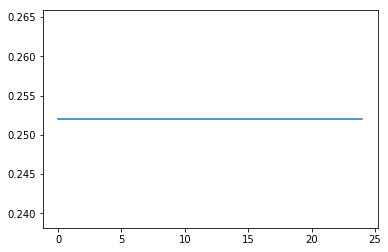

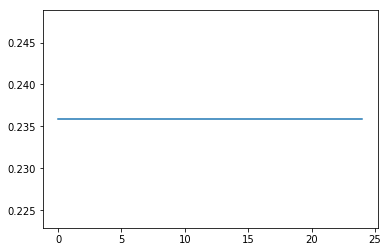

In [61]:
plt.close('all')
plt.plot(MSE_train)
plt.show()

plt.plot(MSE_test)
plt.show()

In [63]:
        X_train = []
        y_train = []
        X_test = []
        y_test = []
        f_emb_2015 = open('/Users/olgagerasimova/Desktop/Data/emb_new_nw/out15nw_'+str(1)+'_'+str(1)+'.txt')
        f_emb_2016 = open('/Users/olgagerasimova/Desktop/Data/emb_new_nw/out16nw_'+str(1)+'_'+str(1)+'.txt')
        emb_2015 = []
        emb_2016 = []
        for line in f_emb_2015:
            emb_2015.append(line.split(' '))
        for line in f_emb_2016:
            emb_2016.append(line.split(' '))
        f_emb_2015.close()
        f_emb_2016.close()
        for i in range(len(emb_2016)):
            emb_2016[i][len(emb_2016[i])-1] = emb_2016[i][len(emb_2016[i])-1][:-1]
        for i in range(len(emb_2015)):
            emb_2015[i][len(emb_2015[i])-1] = emb_2015[i][len(emb_2015[i])-1][:-1]
        emb_2015_dict = {} 
        for i in range(1,len(emb_2015)):
            emb_2015_dict[int(emb_2015[i][0])] = [float(j) for j in emb_2015[i][1:]]
        emb_2016_dict = {} 
        for i in range(1,len(emb_2016)):
            emb_2016_dict[int(emb_2016[i][0])] = [float(j) for j in emb_2016[i][1:]]
        
        for e in edges_2017:
            if (e[0] in nodes_2016) and (e[1] in nodes_2016):
                emb1 = emb_2016_dict[int(e[0])]
                emb2 = emb_2016_dict[int(e[1])]
                w_17 = float(e[2])
                y_test.append(w_17)
                res = avg_sum(emb1, emb2)
                try:
                    w_16 = float(edges_2016_dict[(e[0], e[1])])
                except  KeyError :
                    w_16 = 0
                #res = np.append(res,w_16)
                X_test.append(res)
            
        for e in edges_2016:
            if (e[0] in nodes_2015) and (e[1] in nodes_2015):
                emb1 = emb_2015_dict[int(e[0])]
                emb2 = emb_2015_dict[int(e[1])]
                w_16 = float(e[2])
                y_train.append(w_16)
                res = avg_sum(emb1, emb2)
                try:
                    w_15 = float(edges_2015_dict[(e[0], e[1])])
                except  KeyError :
                    w_15 = 0
                #res = np.append(res,w_15)
                X_train.append(res)
            
        mse_train, cv_train, mse_test,cv_test, mae_train, mape_train, mae_test,mape_test,y_pred_lasso_train,y_pred_lasso=\
        model_lasso_preds(X_train, y_train, X_test, y_test)

In [65]:
for i in range(len(y_pred_lasso)):
    print y_test[i],y_pred_lasso[i]

0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
4.0 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
2.15 0.150800472965
0.1 0.150800472965
4.0 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.55 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
4.0 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
0.1 0.150800472965
4.0 0.150800472965
0.1 0.150800472965
0.1 0.1508

In [88]:
for i in y_test:
    print i

0.1
0.1
0.1
0.1
0.1
4.0
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
2.15
0.1
4.0
0.1
0.1
0.1
0.55
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
4.0
0.1
0.1
0.1
4.0
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
1.07142857143
1.0
0.1
0.1
0.1
4.0
0.1
0.1
0.1
3.0
0.18
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
4.0
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
1.06666666667
0.1
0.1
0.1
0.1
0.1
3.0
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.390909090909
4.0
0.1
0.1
0.1
0.1
0.733333333333
0.1
0.1
0.1
2.0
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
4.0
0.1
0.1
0.1
0.1
1.05
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
1.0
0.3
0.1
2.0
3.0
0.166666666667
0.1
0.1
1.2
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
4.0
0.48
0.1
0.1
0.48
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.825
0.1
0.14
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.

In [66]:
for i in y_pred_lasso:
    print i

0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.150800472965
0.15080047

In [67]:
print mse_train, cv_train, mse_test,cv_test, mae_train, mape_train, mae_test,mape_test

0.251999598231 [-0.25596014695456459, 0.38482879919817997] 0.235869125736 [-0.23979515572482252, 0.37425072536714582] 0.187528518545 inf 0.184344699668 inf


In [68]:
np.argmin(MSE_train) # q=2 p = 0.25

0

In [69]:
np.argmin(MSE_test) # q=4 p = 0.5

0

### Part 2  эмбединг без весов

In [92]:
f_2015 = open('/Users/olgagerasimova/Desktop/Data/edgelist__2015nw.txt')
f_2016 = open('/Users/olgagerasimova/Desktop/Data/edgelist__2016nw.txt')
f_2017 = open('/Users/olgagerasimova/Desktop/Data/edgelist__2017nw.txt')


edges_2015nw = []
edges_2016nw = []
edges_2017nw = []


for line in f_2015:
    edges_2015nw.append(line.split(' '))
for line in f_2016:
    edges_2016nw.append(line.split(' '))
for line in f_2017:
    edges_2017nw.append(line.split(' '))

f_2015.close()
f_2016.close()
f_2017.close()

for i in range(len(edges_2015nw)):
    edges_2015nw[i][1] = edges_2015nw[i][1][:-1]

for i in range(len(edges_2016nw)):
    edges_2016nw[i][1] = edges_2016nw[i][1][:-1]
    
for i in range(len(edges_2017nw)):
    edges_2017nw[i][1] = edges_2017nw[i][1][:-1]

In [96]:
# https://github.com/aditya-grover/node2vec
values = [0.25,0.5,1,2,4] # d = 128
for x in values:
    for y in values:
        %run /Users/olgagerasimova/Downloads/node2vec-master/src/main.py --input /Users/olgagerasimova/Desktop/Data/edgelist__2015nw.txt --output /Users/olgagerasimova/Desktop/Data/emb_new_nw/out15nw_{x}_{y}.txt --q {x} --p {y}
        %run /Users/olgagerasimova/Downloads/node2vec-master/src/main.py --input /Users/olgagerasimova/Desktop/Data/edgelist__2016nw.txt --output /Users/olgagerasimova/Desktop/Data/emb_new_nw/out16nw_{x}_{y}.txt --q {x} --p {y} 

Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10

In [121]:
MSE_train= []
CV_train = []
MSE_test= []
CV_test = []
MAE_train = []
MAPE_train =[]
MAE_test = []
MAPE_test =[]
values = [0.25,0.5,1,2,4]
for x in values:
    for y in values:
        X_train = []
        y_train = []
        X_test = []
        y_test = []
        f_emb_2015 = open('/Users/olgagerasimova/Desktop/Data/emb_new_nw/out15nw_'+str(x)+'_'+str(y)+'.txt')
        f_emb_2016 = open('/Users/olgagerasimova/Desktop/Data/emb_new_nw/out16nw_'+str(x)+'_'+str(y)+'.txt')
        emb_2015 = []
        emb_2016 = []
        for line in f_emb_2015:
            emb_2015.append(line.split(' '))
        for line in f_emb_2016:
            emb_2016.append(line.split(' '))
        f_emb_2015.close()
        f_emb_2016.close()
        for i in range(len(emb_2016)):
            emb_2016[i][len(emb_2016[i])-1] = emb_2016[i][len(emb_2016[i])-1][:-1]
        for i in range(len(emb_2015)):
            emb_2015[i][len(emb_2015[i])-1] = emb_2015[i][len(emb_2015[i])-1][:-1]
        emb_2015_dict = {} 
        for i in range(1,len(emb_2015)):
            emb_2015_dict[int(emb_2015[i][0])] = [float(j) for j in emb_2015[i][1:]]
        emb_2016_dict = {} 
        for i in range(1,len(emb_2016)):
            emb_2016_dict[int(emb_2016[i][0])] = [float(j) for j in emb_2016[i][1:]]
        
        for e in edges_2017:
            if (e[0] in nodes_2016) and (e[1] in nodes_2016):
                emb1 = emb_2016_dict[int(e[0])]
                emb2 = emb_2016_dict[int(e[1])]
                w_17 = float(e[2])
                y_test.append(w_17)
                res = avg_sum(emb1, emb2)
                try:
                    w_16 = float(edges_2016_dict[(e[0], e[1])])
                except  KeyError :
                    w_16 = 0
                #res = np.append(res,w_16)
                X_test.append(res)
            
        for e in edges_2016:
            if (e[0] in nodes_2015) and (e[1] in nodes_2015):
                emb1 = emb_2015_dict[int(e[0])]
                emb2 = emb_2015_dict[int(e[1])]
                w_16 = float(e[2])
                y_train.append(w_16)
                res = avg_sum(emb1, emb2)
                try:
                    w_15 = float(edges_2015_dict[(e[0], e[1])])
                except  KeyError :
                    w_15 = 0
                #res = np.append(res,w_15)
                X_train.append(res)
            
        mse_train, cv_train, mse_test,cv_test, mae_train, mape_train, mae_test,mape_test = model_lasso(X_train, y_train, X_test, y_test)
        MSE_train.append(mse_train)
        CV_train.append( cv_train)
        MSE_test.append(mse_test)
        CV_test.append(cv_test)
        MAE_train.append(mae_train)
        MAPE_train.append(mape_train)
        MAE_test.append(mae_test)
        MAPE_test.append(mape_test)
        print x,y

0.25 0.25
0.25 0.5
0.25 1
0.25 2
0.25 4
0.5 0.25
0.5 0.5
0.5 1
0.5 2
0.5 4
1 0.25
1 0.5
1 1
1 2
1 4
2 0.25
2 0.5
2 1
2 2
2 4
4 0.25
4 0.5
4 1
4 2
4 4


In [122]:
np.argmin(MSE_test) # q=4 p = 0.5

9

In [123]:
np.argmin(MSE_train) # q=4 p = 0.5

20

In [124]:
f_res = open('/Users/olgagerasimova/Desktop/Data/emb_new_nw/res_nw_pq_lasso_only_emb.txt','w')
for i in range(len(MSE_train)):
    f_res.write(str(MSE_train[i])+"  "+str(CV_train[i][0]) +"  "+ str(CV_train[i][1])+"  "+str(MSE_test[i])+"  "\
                +str(CV_test[i][0]) +"  "+ str(CV_test[i][1])+"  "+str(MAE_train[i])+"  "+str(MAPE_train[i]) +"  "\
                + str(MAE_test[i])+ "  "+str(MAPE_test[i])+'\n')
f_res.close()

In [120]:
        X_train = []
        y_train = []
        X_test = []
        y_test = []
        X_base_test = []
        X_base_train = []
        f_emb_2015 = open('/Users/olgagerasimova/Desktop/Data/emb_new_nw/out15nw_'+str(0.5)+'_'+str(0.25)+'.txt')
        f_emb_2016 = open('/Users/olgagerasimova/Desktop/Data/emb_new_nw/out16nw_'+str(0.5)+'_'+str(0.25)+'.txt')
        emb_2015 = []
        emb_2016 = []
        for line in f_emb_2015:
            emb_2015.append(line.split(' '))
        for line in f_emb_2016:
            emb_2016.append(line.split(' '))
        f_emb_2015.close()
        f_emb_2016.close()
        for i in range(len(emb_2016)):
            emb_2016[i][len(emb_2016[i])-1] = emb_2016[i][len(emb_2016[i])-1][:-1]
        for i in range(len(emb_2015)):
            emb_2015[i][len(emb_2015[i])-1] = emb_2015[i][len(emb_2015[i])-1][:-1]
        emb_2015_dict = {} 
        for i in range(1,len(emb_2015)):
            emb_2015_dict[int(emb_2015[i][0])] = [float(j) for j in emb_2015[i][1:]]
        emb_2016_dict = {} 
        for i in range(1,len(emb_2016)):
            emb_2016_dict[int(emb_2016[i][0])] = [float(j) for j in emb_2016[i][1:]]
        
        for e in edges_2017:
            if (e[0] in nodes_2016) and (e[1] in nodes_2016):
                emb1 = emb_2016_dict[int(e[0])]
                emb2 = emb_2016_dict[int(e[1])]
                w_17 = float(e[2])
                y_test.append(w_17)
                res = avg_sum(emb1, emb2)
                try:
                    w_16 = float(edges_2016_dict[(e[0], e[1])])
                except  KeyError :
                    w_16 = 0
                res = np.append(res,w_16)
                X_test.append(res)
                X_base_test.append([w_16])
            
        for e in edges_2016:
            if (e[0] in nodes_2015) and (e[1] in nodes_2015):
                emb1 = emb_2015_dict[int(e[0])]
                emb2 = emb_2015_dict[int(e[1])]
                w_16 = float(e[2])
                y_train.append(w_16)
                res = avg_sum(emb1, emb2)
                try:
                    w_15 = float(edges_2015_dict[(e[0], e[1])])
                except  KeyError :
                    w_15 = 0
                res = np.append(res,w_15)
                X_train.append(res)
                X_base_train.append([w_15])
            
        mse_train, cv_train, mse_test,cv_test, mae_train, mape_train, mae_test,mape_test, y_pred_train, y_pred_test = model_svr(X_train, y_train, X_test, y_test)
        print mse_train, cv_train, mse_test,cv_test, mae_train, mape_train, mae_test,mape_test
        mse_train, cv_train, mse_test,cv_test, mae_train, mape_train, mae_test,mape_test, y_pred_train_b, y_pred_test_b = model_svr(X_base_train, y_train, X_base_test, y_test)
        print mse_train, cv_train, mse_test,cv_test, mae_train, mape_train, mae_test,mape_test

0.07860420895189252 [-0.07933701814920677, 0.0743455914131355] 0.02739715927721243 [-0.0176196706614618, 0.01025905247536619] 0.1059362722920154 71.20850896636351 0.1322435466481392 111.21793519916605
0.07887832288014283 [-0.07890642881961545, 0.07028494102244257] 0.022232009705110026 [-0.021222959280213425, 0.01049791535873109] 0.12532550656750419 90.29776092666272 0.10581364929799568 88.89198626687651


In [114]:
for i in range(len(y_pred_test)):
    print X_test[i][128]-y_test[i],y_test[i],y_pred_test[i]

0.0 0.1 0.1855801630855729
0.0 0.1 0.22564981282925056
0.0 0.1 0.23134249013860042
0.0 0.1 0.2285603146607914
0.0 0.1 0.24065893796088234
0.0 4.0 3.7964454117404927
0.0 0.1 0.21064082411656038
0.0 0.1 0.21292750835881036
0.0 0.1 0.25546465849058
0.0 0.1 0.22609841569869482
-0.1 0.1 0.12817921037613844
0.0 0.1 0.23455118994868673
0.0 0.1 0.23936799220497007
0.0 0.1 0.19954643180157206
0.0 0.1 0.2204566684863093
0.0 0.1 0.23392046043477976
0.0 0.1 0.22228073834632867
-0.1 0.1 0.13261593821035977
-0.1 0.1 0.1440889214767319
0.0 0.1 0.22122008601251197
0.0 0.1 0.21913468501869315
0.0 0.1 0.24687787481803336
-0.1 0.1 0.1359345298634388
0.0 0.1 0.2197974437433784
0.0 0.1 0.239189209466096
0.0 0.1 0.24160125344059913
0.0 0.1 0.24081839885070067
0.0 0.1 0.22601272909705328
0.5500000000000003 2.15 2.5818780479955903
0.0 0.1 0.2668160949132009
0.0 4.0 3.6585764418742395
0.0 0.1 0.22454816673599498
0.0 0.1 0.24386056620972718
0.0 0.1 0.2261806403929003
0.44999999999999996 0.55 1.0308774335907671


### Part 3 меняем d

In [127]:
values_d = [16,32,64,128,256]
for d in values_d:
    %run /Users/olgagerasimova/Downloads/node2vec-master/src/main.py --input /Users/olgagerasimova/Desktop/Data/edgelist__2015nw.txt --output /Users/olgagerasimova/Desktop/Data/emb_new_nw/out15nw_d_{d}.txt --dimensions {d} --q 0.5 --p 4
    %run /Users/olgagerasimova/Downloads/node2vec-master/src/main.py --input /Users/olgagerasimova/Desktop/Data/edgelist__2016nw.txt --output /Users/olgagerasimova/Desktop/Data/emb_new_nw/out16nw_d_{d}.txt --dimensions {d} --q 0.5 --p 4 

Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10


In [70]:
def model_svr(X_train, y_train, X_test, y_test):
    MSE_train= []
    CV_train = []
    MSE_test= []
    CV_test = []
    MAE_train = []
    MAPE_train =[]
    MAE_test = []
    MAPE_test =[]
    
    # SVR
    svr = svm.SVR()
    svr.fit(X_train, y_train)
                     
    y_pred_train = svr.predict(X_train)
    y_pred_test = svr.predict(X_test)
    
    MSE_train.append(np.mean((y_pred_train - y_train) ** 2))
    MSE_test.append(np.mean((y_pred_test - y_test) ** 2))
    
    scores1 = cross_val_score(svr, X_train, y_train, cv=10,scoring='neg_mean_squared_error')
    CV_train.append([scores1.mean(), scores1.std() * 2])
    scores2 = cross_val_score(svr, X_test, y_test, cv=10,scoring='neg_mean_squared_error')
    CV_test.append([scores2.mean(), scores2.std() * 2])
    
    MAE_train.append(metrics.mean_absolute_error(y_train, y_pred_train))
    MAE_test.append(metrics.mean_absolute_error(y_test, y_pred_test))
    
    MAPE_train.append(np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100)
    MAPE_test.append(np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100)


    return MSE_train[0], CV_train[0], MSE_test[0], CV_test[0], MAE_train[0], MAPE_train[0], MAE_test[0], MAPE_test[0]   

In [71]:
def model_svr_preds(X_train, y_train, X_test, y_test):
    MSE_train= []
    CV_train = []
    MSE_test= []
    CV_test = []
    MAE_train = []
    MAPE_train =[]
    MAE_test = []
    MAPE_test =[]
    
    # SVR
    svr = svm.SVR()
    svr.fit(X_train, y_train)
                     
    y_pred_train = svr.predict(X_train)
    y_pred_test = svr.predict(X_test)
    
    MSE_train.append(np.mean((y_pred_train - y_train) ** 2))
    MSE_test.append(np.mean((y_pred_test - y_test) ** 2))
    
    scores1 = cross_val_score(svr, X_train, y_train, cv=10,scoring='neg_mean_squared_error')
    CV_train.append([scores1.mean(), scores1.std() * 2])
    scores2 = cross_val_score(svr, X_test, y_test, cv=10,scoring='neg_mean_squared_error')
    CV_test.append([scores2.mean(), scores2.std() * 2])
    
    MAE_train.append(metrics.mean_absolute_error(y_train, y_pred_train))
    MAE_test.append(metrics.mean_absolute_error(y_test, y_pred_test))
    
    MAPE_train.append(np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100)
    MAPE_test.append(np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100)


    return MSE_train[0], CV_train[0], MSE_test[0], CV_test[0], MAE_train[0], MAPE_train[0], MAE_test[0], MAPE_test[0], y_pred_train, y_pred_test   

In [ ]:
MSE_train= []
CV_train = []
MSE_test= []
CV_test = []
MAE_train = []
MAPE_train =[]
MAE_test = []
MAPE_test =[]
values_d = [16,32,64,128,256]
for d in values_d:
        X_train = []
        y_train = []
        X_test = []
        y_test = []
        f_emb_2015 = open('/Users/olgagerasimova/Desktop/Data/emb_new_nw/out15nw_d_'+str(d)+'.txt')
        f_emb_2016 = open('/Users/olgagerasimova/Desktop/Data/emb_new_nw/out16nw_d_'+str(d)+'.txt')
        emb_2015 = []
        emb_2016 = []
        for line in f_emb_2015:
            emb_2015.append(line.split(' '))
        for line in f_emb_2016:
            emb_2016.append(line.split(' '))
        f_emb_2015.close()
        f_emb_2016.close()
        for i in range(len(emb_2016)):
            emb_2016[i][len(emb_2016[i])-1] = emb_2016[i][len(emb_2016[i])-1][:-1]
        for i in range(len(emb_2015)):
            emb_2015[i][len(emb_2015[i])-1] = emb_2015[i][len(emb_2015[i])-1][:-1]
        emb_2015_dict = {} 
        for i in range(1,len(emb_2015)):
            emb_2015_dict[int(emb_2015[i][0])] = [float(j) for j in emb_2015[i][1:]]
        emb_2016_dict = {} 
        for i in range(1,len(emb_2016)):
            emb_2016_dict[int(emb_2016[i][0])] = [float(j) for j in emb_2016[i][1:]]
        
        for e in edges_2017:
            if (e[0] in nodes_2016) and (e[1] in nodes_2016):
                emb1 = emb_2016_dict[int(e[0])]
                emb2 = emb_2016_dict[int(e[1])]
                w_17 = float(e[2])
                y_test.append(w_17)
                res = avg_sum(emb1, emb2) # !!! use different functions
                try:
                    w_16 = float(edges_2016_dict[(e[0], e[1])])
                except  KeyError :
                    w_16 = 0
                #res = np.append(res,w_16)
                X_test.append(res)
            
        for e in edges_2016:
            if (e[0] in nodes_2015) and (e[1] in nodes_2015):
                emb1 = emb_2015_dict[int(e[0])]
                emb2 = emb_2015_dict[int(e[1])]
                w_16 = float(e[2])
                y_train.append(w_16)
                res = avg_sum(emb1, emb2) # !!!
                try:
                    w_15 = float(edges_2015_dict[(e[0], e[1])])
                except  KeyError :
                    w_15 = 0
                #res = np.append(res,w_15)
                X_train.append(res)
        mse_train, cv_train, mse_test,cv_test, mae_train, mape_train, mae_test,mape_test = model_svr(X_train, y_train, X_test, y_test)
        MSE_train.append(mse_train)
        CV_train.append( cv_train)
        MSE_test.append(mse_test)
        CV_test.append(cv_test)
        MAE_train.append(mae_train)
        MAPE_train.append(mape_train)
        MAE_test.append(mae_test)
        MAPE_test.append(mape_test)
        print d
        
        X_train = []
        y_train = []
        X_test = []
        y_test = []
        for e in edges_2017:
            if (e[0] in nodes_2016) and (e[1] in nodes_2016):
                emb1 = emb_2016_dict[int(e[0])]
                emb2 = emb_2016_dict[int(e[1])]
                w_17 = float(e[2])
                y_test.append(w_17)
                res = mult(emb1, emb2) # !!! use different functions
                try:
                    w_16 = float(edges_2016_dict[(e[0], e[1])])
                except  KeyError :
                    w_16 = 0
                #res = np.append(res,w_16)
                X_test.append(res)
            
        for e in edges_2016:
            if (e[0] in nodes_2015) and (e[1] in nodes_2015):
                emb1 = emb_2015_dict[int(e[0])]
                emb2 = emb_2015_dict[int(e[1])]
                w_16 = float(e[2])
                y_train.append(w_16)
                res = mult(emb1, emb2) # !!!
                try:
                    w_15 = float(edges_2015_dict[(e[0], e[1])])
                except  KeyError :
                    w_15 = 0
                #res = np.append(res,w_15)
                X_train.append(res)
        mse_train, cv_train, mse_test,cv_test, mae_train, mape_train, mae_test,mape_test = model_svr(X_train, y_train, X_test, y_test)
        MSE_train.append(mse_train)
        CV_train.append( cv_train)
        MSE_test.append(mse_test)
        CV_test.append(cv_test)
        MAE_train.append(mae_train)
        MAPE_train.append(mape_train)
        MAE_test.append(mae_test)
        MAPE_test.append(mape_test)
        print d
        
        X_train = []
        y_train = []
        X_test = []
        y_test = []
        for e in edges_2017:
            if (e[0] in nodes_2016) and (e[1] in nodes_2016):
                emb1 = emb_2016_dict[int(e[0])]
                emb2 = emb_2016_dict[int(e[1])]
                w_17 = float(e[2])
                y_test.append(w_17)
                res = w_l1(emb1, emb2) # !!! use different functions
                try:
                    w_16 = float(edges_2016_dict[(e[0], e[1])])
                except  KeyError :
                    w_16 = 0
                #res = np.append(res,w_16)
                X_test.append(res)
            
        for e in edges_2016:
            if (e[0] in nodes_2015) and (e[1] in nodes_2015):
                emb1 = emb_2015_dict[int(e[0])]
                emb2 = emb_2015_dict[int(e[1])]
                w_16 = float(e[2])
                y_train.append(w_16)
                res = w_l1(emb1, emb2) # !!!
                try:
                    w_15 = float(edges_2015_dict[(e[0], e[1])])
                except  KeyError :
                    w_15 = 0
                #res = np.append(res,w_15)
                X_train.append(res)
        mse_train, cv_train, mse_test,cv_test, mae_train, mape_train, mae_test,mape_test = model_svr(X_train, y_train, X_test, y_test)
        MSE_train.append(mse_train)
        CV_train.append( cv_train)
        MSE_test.append(mse_test)
        CV_test.append(cv_test)
        MAE_train.append(mae_train)
        MAPE_train.append(mape_train)
        MAE_test.append(mae_test)
        MAPE_test.append(mape_test)
        print d
        
        X_train = []
        y_train = []
        X_test = []
        y_test = []
        for e in edges_2017:
            if (e[0] in nodes_2016) and (e[1] in nodes_2016):
                emb1 = emb_2016_dict[int(e[0])]
                emb2 = emb_2016_dict[int(e[1])]
                w_17 = float(e[2])
                y_test.append(w_17)
                #res = w_l2(emb1, emb2) # !!! use different functions
                try:
                    w_16 = float(edges_2016_dict[(e[0], e[1])])
                except  KeyError :
                    w_16 = 0
                #res = np.append(res,w_16)
                X_test.append(res)
            
        for e in edges_2016:
            if (e[0] in nodes_2015) and (e[1] in nodes_2015):
                emb1 = emb_2015_dict[int(e[0])]
                emb2 = emb_2015_dict[int(e[1])]
                w_16 = float(e[2])
                y_train.append(w_16)
                res = w_l2(emb1, emb2) # !!!
                try:
                    w_15 = float(edges_2015_dict[(e[0], e[1])])
                except  KeyError :
                    w_15 = 0
                #res = np.append(res,w_15)
                X_train.append(res)
        mse_train, cv_train, mse_test,cv_test, mae_train, mape_train, mae_test,mape_test = model_svr(X_train, y_train, X_test, y_test)
        MSE_train.append(mse_train)
        CV_train.append( cv_train)
        MSE_test.append(mse_test)
        CV_test.append(cv_test)
        MAE_train.append(mae_train)
        MAPE_train.append(mape_train)
        MAE_test.append(mae_test)
        MAPE_test.append(mape_test)
        print d
        
        X_train = []
        y_train = []
        X_test = []
        y_test = []
        for e in edges_2017:
            if (e[0] in nodes_2016) and (e[1] in nodes_2016):
                emb1 = emb_2016_dict[int(e[0])]
                emb2 = emb_2016_dict[int(e[1])]
                w_17 = float(e[2])
                y_test.append(w_17)
                res = nw_l1(emb1, emb2, Graph_2016,int(e[0]),int(e[1]),emb_2016_dict) # !!! use different functions
                try:
                    w_16 = float(edges_2016_dict[(e[0], e[1])])
                except  KeyError :
                    w_16 = 0
                #res = np.append(res,w_16)
                X_test.append(res)
            
        for e in edges_2016:
            if (e[0] in nodes_2015) and (e[1] in nodes_2015):
                emb1 = emb_2015_dict[int(e[0])]
                emb2 = emb_2015_dict[int(e[1])]
                w_16 = float(e[2])
                y_train.append(w_16)
                res = nw_l1(emb1, emb2, Graph_2015,int(e[0]),int(e[1]),emb_2015_dict) # !!!
                try:
                    w_15 = float(edges_2015_dict[(e[0], e[1])])
                except  KeyError :
                    w_15 = 0
                #res = np.append(res,w_15)
                X_train.append(res)
        mse_train, cv_train, mse_test,cv_test, mae_train, mape_train, mae_test,mape_test = model_svr(X_train, y_train, X_test, y_test)
        MSE_train.append(mse_train)
        CV_train.append( cv_train)
        MSE_test.append(mse_test)
        CV_test.append(cv_test)
        MAE_train.append(mae_train)
        MAPE_train.append(mape_train)
        MAE_test.append(mae_test)
        MAPE_test.append(mape_test)
        print d
        
        X_train = []
        y_train = []
        X_test = []
        y_test = []
        for e in edges_2017:
            if (e[0] in nodes_2016) and (e[1] in nodes_2016):
                emb1 = emb_2016_dict[int(e[0])]
                emb2 = emb_2016_dict[int(e[1])]
                w_17 = float(e[2])
                y_test.append(w_17)
                res = nw_l2(emb1, emb2, Graph_2016,int(e[0]),int(e[1]),emb_2016_dict) # !!! use different functions
                try:
                    w_16 = float(edges_2016_dict[(e[0], e[1])])
                except  KeyError :
                    w_16 = 0
                #res = np.append(res,w_16)
                X_test.append(res)
            
        for e in edges_2016:
            if (e[0] in nodes_2015) and (e[1] in nodes_2015):
                emb1 = emb_2015_dict[int(e[0])]
                emb2 = emb_2015_dict[int(e[1])]
                w_16 = float(e[2])
                y_train.append(w_16)
                res = nw_l2(emb1, emb2, Graph_2015,int(e[0]),int(e[1]),emb_2015_dict) # !!!
                try:
                    w_15 = float(edges_2015_dict[(e[0], e[1])])
                except  KeyError :
                    w_15 = 0
                #res = np.append(res,w_15)
                X_train.append(res)
        mse_train, cv_train, mse_test,cv_test, mae_train, mape_train, mae_test,mape_test = model_svr(X_train, y_train, X_test, y_test)
        MSE_train.append(mse_train)
        CV_train.append( cv_train)
        MSE_test.append(mse_test)
        CV_test.append(cv_test)
        MAE_train.append(mae_train)
        MAPE_train.append(mape_train)
        MAE_test.append(mae_test)
        MAPE_test.append(mape_test)
        print d   

16
16
16
16
16
16
32
32
32
32
32
32
64
64
64
64
64
64


In [133]:
f_res_d = open('/Users/olgagerasimova/Desktop/Data/emb_new_nw/res_nw_d_svr_only_emb_negsamp.txt','w')
for i in range(len(MSE_train)):
    f_res_d.write(str(MSE_train[i])+"  "+str(CV_train[i][0]) +"  "+ str(CV_train[i][1])+"  "+str(MSE_test[i])+"  "\
                +str(CV_test[i][0]) +"  "+ str(CV_test[i][1])+"  "+str(MAE_train[i])+"  "+str(MAPE_train[i]) +"  "\
                + str(MAE_test[i])+ "  "+str(MAPE_test[i])+'\n')
f_res_d.close()

In [134]:
np.argmin(MSE_train) #  d= 

5

In [135]:
np.argmin(MSE_test) #  d= 

18

In [143]:
MSE_train

[0.3519227333740646,
 0.3128882307054892,
 0.43609440467015353,
 0.42487258954285445,
 0.3064622017474158,
 0.17987732572591789,
 0.35896217624530796,
 0.348315713873049,
 0.4362770809548097,
 0.42743329740198216,
 0.3139514940100912,
 0.21684335055821624,
 0.39454864144675855,
 0.4057602835704822,
 0.43839615768005114,
 0.4379905278242684,
 0.3577721511266433,
 0.29328003689548343,
 0.4082309071721121,
 0.42670352577304194,
 0.438649432842086,
 0.43877911211702136,
 0.38274208370408963,
 0.3467415226964201,
 0.4207340758402508,
 0.42844133135893614,
 0.43879644667815215,
 0.43882881130571644,
 0.3956616199650939,
 0.3873638431438263]

In [146]:
np.array(MSE_train)[[0,6,12,18,24]]

array([0.35192273, 0.35896218, 0.39454864, 0.40823091, 0.42073408])

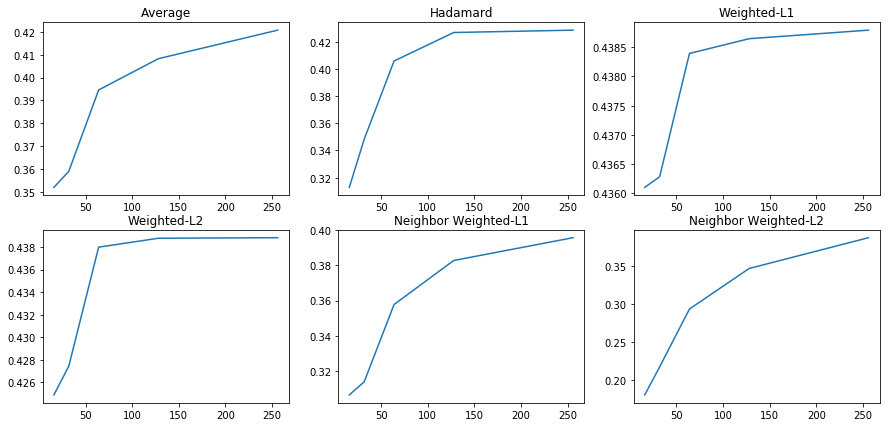

In [176]:
plt.close('all')
d = [16,32,64,128,256]
xi = [i for i in range(0, len(d))]
fig, axarr = plt.subplots(2, 3,figsize=(15, 7))
fig = plt.figure(figsize=(40,60))

f1 = np.array(MSE_train)[[0,6,12,18,24]]
f2 = np.array(MSE_train)[[1,7,13,19,25]]
f3 = np.array(MSE_train)[[2,8,14,20,26]]
f4 = np.array(MSE_train)[[3,9,15,21,27]]
f5 = np.array(MSE_train)[[4,10,16,22,28]]
f6 = np.array(MSE_train)[[5,11,17,23,29]]

axarr[0, 0].plot(d,f1)
#plt.xticks(xi, d)
axarr[0, 0].set_title('Average')
axarr[0, 1].plot(d,f2)
axarr[0, 1].set_title('Hadamard')
axarr[0, 2].plot(d,f3)
axarr[0, 2].set_title('Weighted-L1')
axarr[1, 0].plot(d,f4)
axarr[1, 0].set_title('Weighted-L2')
axarr[1, 1].plot(d,f5)
axarr[1, 1].set_title('Neighbor Weighted-L1')
axarr[1, 2].plot(d,f6)
axarr[1, 2].set_title('Neighbor Weighted-L2')

plt.show()

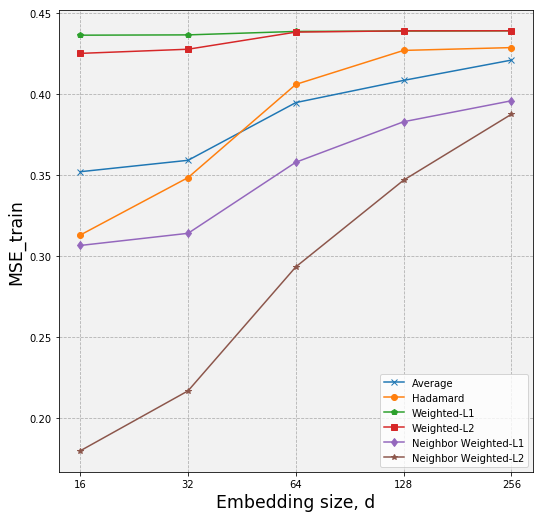

In [253]:
plt.close('all')
d = [4,5,6,7,8]
di = [16,32,64,128,256]
f1 = np.array(MSE_train)[[0,6,12,18,24]]
f2 = np.array(MSE_train)[[1,7,13,19,25]]
f3 = np.array(MSE_train)[[2,8,14,20,26]]
f4 = np.array(MSE_train)[[3,9,15,21,27]]
f5 = np.array(MSE_train)[[4,10,16,22,28]]
f6 = np.array(MSE_train)[[5,11,17,23,29]]
fig, ax = plt.subplots(figsize=(8.5,8.5))
#ax = plt.gca()
ax.set_facecolor((0.95, 0.95, 0.95))
#plt.figure(, )
plt.plot(d,f1, '-x', label='Average')
plt.plot(d,f2, '-o', label='Hadamard')
plt.plot(d,f3, '-p', label='Weighted-L1')
plt.plot(d,f4, '-s', label='Weighted-L2')
plt.plot(d,f5, '-d', label='Neighbor Weighted-L1')
plt.plot(d,f6, '-*', label='Neighbor Weighted-L2')
plt.grid(linestyle='--')
plt.ylabel('MSE_train' ,    {
       'fontsize'            : 'xx-large',
       'verticalalignment'   : 'bottom',
       'horizontalalignment' : 'center' })
plt.xlabel('Embedding size, d',     {
       'fontsize'            : 'xx-large',
       'verticalalignment'   : 'top',
       'horizontalalignment' : 'center' })
plt.xticks(d, di)
plt.legend()
plt.show()

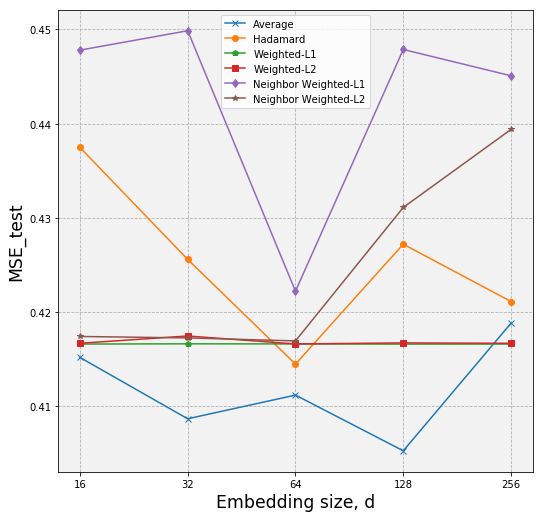

In [254]:
plt.close('all')
d = [4,5,6,7,8]
di = [16,32,64,128,256]
f1 = np.array(MSE_test)[[0,6,12,18,24]]
f2 = np.array(MSE_test)[[1,7,13,19,25]]
f3 = np.array(MSE_test)[[2,8,14,20,26]]
f4 = np.array(MSE_test)[[3,9,15,21,27]]
f5 = np.array(MSE_test)[[4,10,16,22,28]]
f6 = np.array(MSE_test)[[5,11,17,23,29]]
fig, ax = plt.subplots(figsize=(8.5,8.5))
#ax = plt.gca()
ax.set_facecolor((0.95, 0.95, 0.95))
#plt.figure(, )
plt.plot(d,f1, '-x', label='Average')
plt.plot(d,f2, '-o', label='Hadamard')
plt.plot(d,f3, '-p', label='Weighted-L1')
plt.plot(d,f4, '-s', label='Weighted-L2')
plt.plot(d,f5, '-d', label='Neighbor Weighted-L1')
plt.plot(d,f6, '-*', label='Neighbor Weighted-L2')
plt.grid(linestyle='--')
plt.ylabel('MSE_test',    {
       'fontsize'            : 'xx-large',
       'verticalalignment'   : 'bottom',
       'horizontalalignment' : 'center' })
plt.xlabel('Embedding size, d',     {
       'fontsize'            : 'xx-large',
       'verticalalignment'   : 'top',
       'horizontalalignment' : 'center' })
plt.xticks(d, di)
plt.legend()
plt.show()

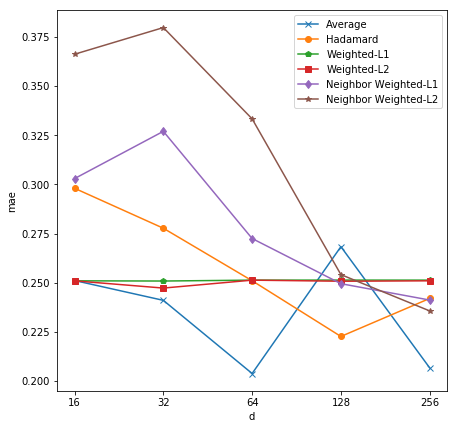

In [206]:
plt.close('all')
d = [4,5,6,7,8]
di = [16,32,64,128,256]
f1 = np.array(MAE_test)[[0,6,12,18,24]]
f2 = np.array(MAE_test)[[1,7,13,19,25]]
f3 = np.array(MAE_test)[[2,8,14,20,26]]
f4 = np.array(MAE_test)[[3,9,15,21,27]]
f5 = np.array(MAE_test)[[4,10,16,22,28]]
f6 = np.array(MAE_test)[[5,11,17,23,29]]
plt.figure(figsize=(7,7))
plt.plot(d,f1, '-x', label='Average')

plt.plot(d,f2, '-o', label='Hadamard')

plt.plot(d,f3, '-p', label='Weighted-L1')

plt.plot(d,f4, '-s', label='Weighted-L2')

plt.plot(d,f5, '-d', label='Neighbor Weighted-L1')

plt.plot(d,f6, '-*', label='Neighbor Weighted-L2')
#plt.title
plt.ylabel('mae')
plt.xlabel('d')
plt.xticks(d, di)
plt.legend()
plt.show()

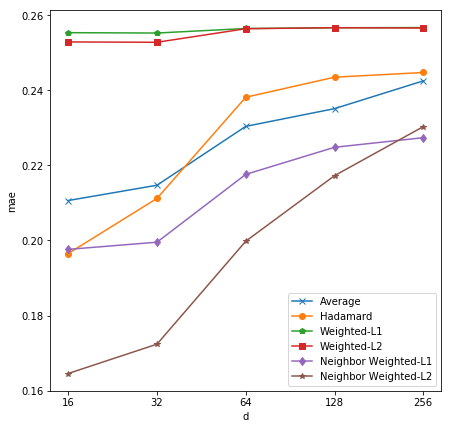

In [207]:
plt.close('all')
d = [4,5,6,7,8]
di = [16,32,64,128,256]
f1 = np.array(MAE_train)[[0,6,12,18,24]]
f2 = np.array(MAE_train)[[1,7,13,19,25]]
f3 = np.array(MAE_train)[[2,8,14,20,26]]
f4 = np.array(MAE_train)[[3,9,15,21,27]]
f5 = np.array(MAE_train)[[4,10,16,22,28]]
f6 = np.array(MAE_train)[[5,11,17,23,29]]
plt.figure(figsize=(7,7))
plt.plot(d,f1, '-x', label='Average')

plt.plot(d,f2, '-o', label='Hadamard')

plt.plot(d,f3, '-p', label='Weighted-L1')

plt.plot(d,f4, '-s', label='Weighted-L2')

plt.plot(d,f5, '-d', label='Neighbor Weighted-L1')

plt.plot(d,f6, '-*', label='Neighbor Weighted-L2')
#plt.title
plt.ylabel('mae')
plt.xlabel('d')
plt.xticks(d, di)
plt.legend()
plt.show()

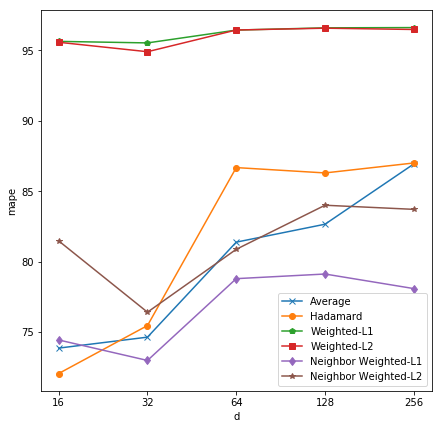

In [208]:
plt.close('all')
d = [4,5,6,7,8]
di = [16,32,64,128,256]
f1 = np.array(MAPE_train)[[0,6,12,18,24]]
f2 = np.array(MAPE_train)[[1,7,13,19,25]]
f3 = np.array(MAPE_train)[[2,8,14,20,26]]
f4 = np.array(MAPE_train)[[3,9,15,21,27]]
f5 = np.array(MAPE_train)[[4,10,16,22,28]]
f6 = np.array(MAPE_train)[[5,11,17,23,29]]
plt.figure(figsize=(7,7))
plt.plot(d,f1, '-x', label='Average')

plt.plot(d,f2, '-o', label='Hadamard')

plt.plot(d,f3, '-p', label='Weighted-L1')

plt.plot(d,f4, '-s', label='Weighted-L2')

plt.plot(d,f5, '-d', label='Neighbor Weighted-L1')

plt.plot(d,f6, '-*', label='Neighbor Weighted-L2')
#plt.title
plt.ylabel('mape')
plt.xlabel('d')
plt.xticks(d, di)
plt.legend()
plt.show()

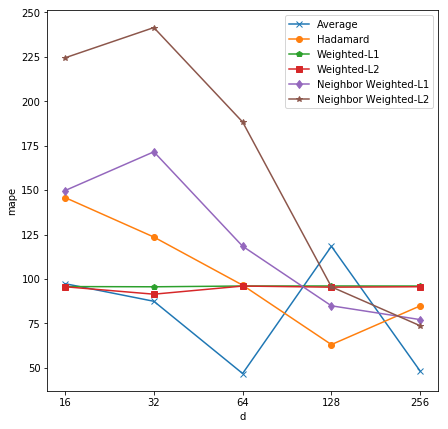

In [209]:
plt.close('all')
d = [4,5,6,7,8]
di = [16,32,64,128,256]
f1 = np.array(MAPE_test)[[0,6,12,18,24]]
f2 = np.array(MAPE_test)[[1,7,13,19,25]]
f3 = np.array(MAPE_test)[[2,8,14,20,26]]
f4 = np.array(MAPE_test)[[3,9,15,21,27]]
f5 = np.array(MAPE_test)[[4,10,16,22,28]]
f6 = np.array(MAPE_test)[[5,11,17,23,29]]
plt.figure(figsize=(7,7))
plt.plot(d,f1, '-x', label='Average')

plt.plot(d,f2, '-o', label='Hadamard')

plt.plot(d,f3, '-p', label='Weighted-L1')

plt.plot(d,f4, '-s', label='Weighted-L2')

plt.plot(d,f5, '-d', label='Neighbor Weighted-L1')

plt.plot(d,f6, '-*', label='Neighbor Weighted-L2')
#plt.title
plt.ylabel('mape')
plt.xlabel('d')
plt.xticks(d, di)
plt.legend()
plt.show()

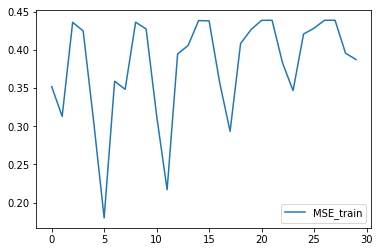

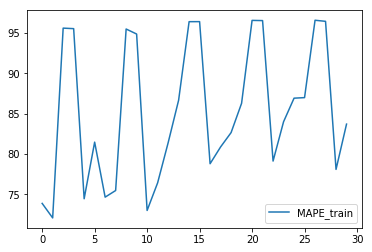

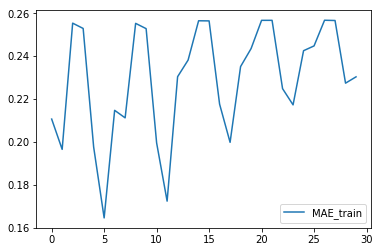

In [138]:
plt.plot(MSE_train, label='MSE_train')
plt.legend()
plt.show()

plt.plot(MAPE_train, label='MAPE_train')
plt.legend()
plt.show()

plt.plot(MAE_train, label='MAE_train')
plt.legend()
plt.show()
#plt.xlabel('x label')
#plt.ylabel('y label')

#plt.title("Simple Plot")




In [ ]:
def iterate_minibatches(X, y, batchsize):

    indices = np.arange(len(X))
    np.random.shuffle(indices)
    for start_idx in range(0, len(X) - batchsize + 1, batchsize):
        excerpt = indices[start_idx:start_idx + batchsize]
        yield X[excerpt], y[excerpt]
   

In [ ]:
def models(X_train, y_train, X_test, y_test):
    MSE_train= []
    CV_train = []
    MSE_test= []
    CV_test = []
    MAE_train = []
    MAPE_train =[]
    MAE_test = []
    MAPE_test =[]
    
    # 1.
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    y_pred_train = regr.predict(X_train)
    y_pred_test =regr.predict(X_test)
    
    # The mean squared error
    MSE_train.append(np.mean(( y_pred_train - y_train) ** 2))
    MSE_test.append(np.mean((y_pred_test - y_test) ** 2))

    # The mean score and the 95% confidence interval of the score estimate are hence given by:
    scores1 = cross_val_score(regr, X_train, y_train, cv=10,scoring='neg_mean_squared_error')
    CV_train.append([scores1.mean(), scores1.std() * 2])
    scores2 = cross_val_score(regr, X_test, y_test, cv=10,scoring='neg_mean_squared_error')
    CV_test.append([scores2.mean(), scores2.std() * 2])
    
    MAE_train.append(metrics.mean_absolute_error(y_train, y_pred_train))
    MAE_test.append(metrics.mean_absolute_error(y_test, y_pred_test))
    
    MAPE_train.append(np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100)
    MAPE_test.append(np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100)
    
    print 1
    
    # 2. Lasso
    lasso = Lasso(alpha = 0.016)
    y_pred_lasso_train = lasso.fit(X_train, y_train).predict(X_train)
    y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
    
    MSE_train.append(np.mean((y_pred_lasso_train - y_train) ** 2))
    MSE_test.append(np.mean((y_pred_lasso - y_test) ** 2))
     
    scores1 = cross_val_score(lasso, X_train, y_train, cv=10,scoring='neg_mean_squared_error')
    CV_train.append([scores1.mean(), scores1.std() * 2])
    scores2 = cross_val_score(lasso, X_test, y_test, cv=10,scoring='neg_mean_squared_error')
    CV_test.append([scores2.mean(), scores2.std() * 2])
    
    MAE_train.append(metrics.mean_absolute_error(y_train, y_pred_lasso_train))
    MAE_test.append(metrics.mean_absolute_error(y_test, y_pred_lasso))
    
    MAPE_train.append(np.mean(np.abs((y_train - y_pred_lasso_train) / y_train)) * 100)
    MAPE_test.append(np.mean(np.abs((y_test - y_pred_lasso) / y_test)) * 100)

    print 2
    
    # 3. SVR
    svr = svm.SVR()
    svr.fit(X_train, y_train)
                     
    y_pred_train = svr.predict(X_train)
    y_pred_test = svr.predict(X_test)
    
    MSE_train.append(np.mean((y_pred_train - y_train) ** 2))
    MSE_test.append(np.mean((y_pred_test - y_test) ** 2))
    
    scores1 = cross_val_score(svr, X_train, y_train, cv=10,scoring='neg_mean_squared_error')
    CV_train.append([scores1.mean(), scores1.std() * 2])
    scores2 = cross_val_score(svr, X_test, y_test, cv=10,scoring='neg_mean_squared_error')
    CV_test.append([scores2.mean(), scores2.std() * 2])
    
    MAE_train.append(metrics.mean_absolute_error(y_train, y_pred_train))
    MAE_test.append(metrics.mean_absolute_error(y_test, y_pred_test))
    
    MAPE_train.append(np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100)
    MAPE_test.append(np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100)
    
    print 3
    
    # 4. GradientBoostingRegressor
    params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
              'learning_rate': 0.01, 'loss': 'ls'}
    clf = GradientBoostingRegressor(**params)
    clf.fit(X_train, y_train)
                     
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)   
                     
    MSE_train.append(np.mean((y_pred_train - y_train) ** 2))
    MSE_test.append(np.mean((y_pred_test - y_test) ** 2))
    
    scores1 = cross_val_score( clf, X_train, y_train, cv=10,scoring='neg_mean_squared_error')
    CV_train.append([scores1.mean(), scores1.std() * 2])
    scores2 = cross_val_score( clf, X_test, y_test, cv=10,scoring='neg_mean_squared_error')
    CV_test.append([scores2.mean(), scores2.std() * 2])
    
    MAE_train.append(metrics.mean_absolute_error(y_train, y_pred_train))
    MAE_test.append(metrics.mean_absolute_error(y_test, y_pred_test))
    
    MAPE_train.append(np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100)
    MAPE_test.append(np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100)
    print 4
    
    # 5.  NN  ??? 
    return MSE_train, CV_train, MSE_test, CV_test, MAE_train, MAPE_train, MAE_test, MAPE_test 

In [34]:
for i in y_test: 
    print i

2.4
3.0
0.3
2.26
0.3
3.0
0.3
0.3
3.0
1.65
0.3
2.0
1.65
0.3
4.0
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
4.0
0.3
3.0
0.3
0.3
0.3
0.3
0.3
2.0
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
3.0
0.3
0.3
0.3
2.0
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
2.15
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
1.15
3.0
0.3
0.3
0.3
0.3
0.3
0.3
4.0
4.0
0.3
0.3
0.3
1.07142857143
0.3
0.3
0.3
2.0
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
4.0
3.0
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
4.0
0.3
0.3
0.3
4.0
0.3
0.3
0.3
0.3
0.3
0.3
2.0
0.3
2.0
0.3
0.3
0.3
0.3
0.3
2.0
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
4.0
0.3
0.3
0.3
3.0
0.3
1.65
0.3
0.3
0.3
2.0
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
1.0
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
3.0
0.3
0.3
0.3
3.0
1.0
3.0
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3
4.0
0.3
3.0
0.3
0.3
0.3
0.3
0.3
0.3
0.3
2.0
0.3
0.3
0.3
0.3
0.3
0.3
0.3
1.9
0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3


In [33]:
for i in y_pred_train: 
    print i

0.34186193118962416
0.38919990664358695
0.4926066758577783
0.39963142164798127
0.37592998137924905
0.31622649972437666
0.39823882932372934
0.39683179727194395
0.3998946350035921
0.40042865999361194
0.3891483643322594
0.3997554395007705
0.3690241144558175
0.4002177022314961
0.3999897090147564
0.37272580595284477
0.3995534688542967
0.4000912423757144
0.21632764411362299
0.38213447688643615
0.37649934676788466
0.36965277091710047
0.3865563561268317
0.40007790214647054
0.39991255837807205
0.3906895259580464
0.23238046929839318
0.40011235672246853
0.3511635005209517
0.38410402846050873
0.40030892285549213
0.371983823175834
0.3738133790185516
0.3864094185938348
0.19977308050129827
0.3995154077970726
0.8467589930241679
0.2691376619909548
0.22621519876391732
0.39992110164581207
0.40015758875835283
1.1124668630074868
0.3999739058095344
0.38452170284792253
0.39075543919269057
0.21139558284467252
0.3484749715245522
0.3552178232581524
0.3888118656243697
0.35663609384790174
0.40008536761809366
0.40

In [ ]:
#f_emb_train = open('/Users/olgagerasimova/Downloads/node2vec-master/emb/out.txt')
#f_emb_2017 = open('/Users/olgagerasimova/Downloads/node2vec-master/emb/out_x.txt')
#for line in f_emb_train:
#    emb_train.append(line.split(' '))
#for line in f_emb_2017:
#    emb_2017.append(line.split(' '))
#emb_train = []
#emb_2017 = []
#f_emb_train.close()
#f_emb_2017.close()

for i in range(len(emb_2017)):
    emb_2017[i][len(emb_2017[i])-1] = emb_2017[i][len(emb_2017[i])-1][:-1]

emb_2017_dict = {} 
for i in range(1,len(emb_2017)):
    emb_2017_dict[int(emb_2017[i][0])] = [float(j) for j in emb_2017[i][1:]]

for i in range(len(emb_train)):
    emb_train[i][len(emb_train[i])-1] = emb_train[i][len(emb_train[i])-1][:-1]

emb_train_dict = {} 
for i in range(1,len(emb_train)):
    emb_train_dict[int(emb_train[i][0])] = [float(j) for j in emb_train[i][1:]]

X_train = []
y_train = []
X_test = []
y_test = []

for e in edges_2017:
    emb1 = emb_2017_dict[int(e[0])]
    emb2 = emb_2017_dict[int(e[1])]
    w = float(e[2])
    y_test.append(w)
    res = avg_sum(emb1, emb2)
    X_test.append(res)

for e in edges_train:
    emb1 = emb_train_dict[int(e[0])]
    emb2 = emb_train_dict[int(e[1])]
    w = float(e[2])
    y_train.append(w)
    res = avg_sum(emb1, emb2)
    X_train.append(res)

MSE_train, CV_train, MSE_test,CV_test, MAE_train, MAPE_train,MAE_test,MAPE_test = \
models(X_train, y_train, X_test, y_test)

MSE_train

CV_train

MAPE_train

MAE_train

MSE_test

CV_test

MAE_test

MAPE_test

In [8]:
X_train=[1,2,3]

In [9]:
input_X = T.tensor3("X")
target_y = T.vector("target Y integer",dtype='float32')
input_shape = [None,len(X_train),len(X_train[0])]
input_layer = L.InputLayer(shape = input_shape,input_var=input_X)

dense = L.DenseLayer(input_layer,num_units=len(X_train),nonlinearity = lasagne.nonlinearities.elu)
#dense = L.batch_norm(dense_1)
dense = L.dropout(dense, p = 0.1)
dense = L.DenseLayer(dense,num_units = round(len(X_train)/2),nonlinearity = lasagne.nonlinearities.elu)
dense_output = L.DenseLayer(dense,num_units = round(len(X_train)/4),nonlinearity = lasagne.nonlinearities.elu)


y_predicted = lasagne.layers.get_output(dense_output)

all_weights = lasagne.layers.get_all_params(dense_output,trainable=True)

#Mean categorical crossentropy as a loss function - similar to logistic loss but for multiclass targets
loss = np.mean(( y_predicted - target_y) ** 2)

#This function computes gradient AND composes weight updates just like you did earlier
updates_sgd = lasagne.updates.sgd(loss, all_weights,learning_rate=0.01)

#function that computes loss and updates weights
train_fun = theano.function([input_X,target_y],loss,updates = updates_sgd)



TypeError: object of type 'int' has no len()

In [ ]:
import time

num_epochs = 100 #amount of passes through the data
            
batch_size = 50 #number of samples processed at each function call

for epoch in range(num_epochs):
    # In each epoch, we do a full pass over the training data:
    train_err = 0
    train_acc = 0
    train_batches = 0
    start_time = time.time()
    for batch in iterate_minibatches(X_train, y_train,batch_size):
        inputs, targets = batch
        train_err_batch = train_fun(inputs, targets)
        train_err += train_err_batch
        train_batches += 1

    
    # Then we print the results for this epoch:
    print("Epoch {} of {} took {:.3f}s".format(
        epoch + 1, num_epochs, time.time() - start_time))

    print("  training loss (in-iteration):\t\t{:.6f}".format(train_err / train_batches))


In [ ]:
test_err = 0
test_batches = 0

for batch in iterate_minibatches(X_train, y_train,batch_size):
    inputs, targets = batch
    test_err_batch = train_fun(inputs, targets)
    test_err += test_err_batch
    test_batches += 1
print("Final results:")
print("  test accuracy:\t\t{:.2f} %".format(
    test_err / test_batches * 100))

Часть D

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_similarity_score

In [19]:
        X_train = []
        y_train = []
        X_test = []
        y_test = []
        for e in edges_2017:
            if (e[0] in nodes_2016) and (e[1] in nodes_2016):
                emb1 = emb_2016_dict[int(e[0])]
                emb2 = emb_2016_dict[int(e[1])]
                w_17 = float(e[2])
                y_test.append(w_17)
                res = cosine_similarity(emb1, emb2)
                res.append(jaccard_similarity_score(emb1, emb2))
                res.append(np.corrcoef(emb1, emb2))
                X_test.append(res)
            
        for e in edges_2016:
            if (e[0] in nodes_2015) and (e[1] in nodes_2015):
                emb1 = emb_2015_dict[int(e[0])]
                emb2 = emb_2015_dict[int(e[1])]
                w_16 = float(e[2])
                y_train.append(w_16)
                res = cosine_similarity(emb1, emb2)
                res.append(jaccard_similarity_score(emb1, emb2))
                res.append(np.corrcoef(emb1, emb2))
                X_train.append(res)
                
        mse_train, cv_train, mse_test,cv_test, mae_train, mape_train, mae_test,mape_test = model_svr(X_train, y_train, X_test, y_test)

NameError: name 'emb_2016_dict' is not defined